# Práctica 3
@Author: Borja Gete & Fernán Ramos @Versión 1.0.1 @Date 22/03/2016

#### Importación de librerías

In [1]:
import networkx as nx # librería de análisis de redes
import numpy as np # librería de computación numérica
import matplotlib.pyplot as plt
#import plotly.plotly as py # Libreria para histogramas
%matplotlib inline

#### Función de preparación del Grafo

In [2]:
def preparacion(grafo):
    #Colocamos los pesos en una unica matriz triangular
    #ya que trabajamos con grafos no dirigidos
    lista=[]
    for i in grafo:
        for j in grafo[i]:
            if j<i:
                dato=grafo[i][j]
                lista.append((j,i,dato))
    grafo.add_edges_from(lista)
    return grafo

#### Función de Creación de la red

In [3]:
def creacion(N,enlaces):
# Crear la red nodirigida
    G=nx.Graph()
    G.add_nodes_from(N)
    G.add_edges_from(enlaces)
    G=preparacion(G)
    return G

#### Función de dibujo del grafo

In [4]:
def mostrar_grafo(grafo):
# Visualizar la red
    pos=nx.fruchterman_reingold_layout(grafo,k=.2)
    nx.draw(grafo,pos,with_labels=True,node_color='b',alpha=0.3)

### Función de simulación de vacunación aleatoria

In [5]:
def aleatorio(T,grafo):
#Devuelve la media de las T simulaciones de la estrategia de vacunación aleatoria
    nodos=np.random.randint(len(grafo.nodes()), size=T) #Array de individuos a los que inmunizar
    inmunizados=0.00
    inmunes=[]
    for nodo in nodos:
        inmunes.append(len(grafo.neighbors(nodo+1))) #Nº de inmunizados al vacunar al individuo nodo
        inmunizados+=len(grafo.neighbors(nodo+1)) #Suma de inmunizados totales al vacunar los individuos
    return inmunizados/T,inmunes

### Función de Simulación de vacunación aleatoria indirecta

In [6]:
def aleatorio_indirecta(T,grafo):
    #Devuelve la media de las T simulaciones de la estrategia de vacunación aleatoria indirecta
    nodos=np.random.randint(len(grafo.nodes()), size=T) #Array de individuos originales a los que inmunizar un vecino al azar
    inmunizados=0.00
    inmunes=[]
    for nodo in nodos:
        #Obtenemos al azar la posicion del individuo a vacunar de la lista de vecinos del individuo original
        num_vecino=np.random.randint(len(grafo.neighbors(nodo+1))) 
        inmunes.append(len(grafo.neighbors(num_vecino+1)))#Nº de inmunizados al vacunar al individuo nodo
        inmunizados+=len(grafo.neighbors(num_vecino+1)) #Suma de inmunizados totales al vacunar los individuos
    return inmunizados/T,inmunes

#### Función de visualización de comparativa de media de simulacion con valores exactos

In [7]:
def relacion_aleatorio(grafo, funcion):
    #Dibujamos un grafico de barras con una barra por cada valor obtenido del nº de individuos vacunados
    # y la comparamos con una linea vertical que representa la media
    #Funcion = 1 -> aleatoria
    #Funcion = 2 -> aleatoria indirecta
    if funcion == 2:
        [x,y]=aleatorio_indirecta(10,grafo)
        print "Simulacion Aleatoria Indirecta"
        color='g'
    else:
        [x,y]=aleatorio(10,grafo)
        print "Simulacion Aleatoria"
        color='r'
    print "-Valores exactos de vacunación (Barras):"
    print y
    print "-Media de la simulación (Línea):"
    print x
    plt.bar(range(len(y)),y,align='center')
    l=plt.axhline(x,linewidth=4,color=color)
    plt.xticks(range(len(y)),range(len(y)))
    plt.show()

Simulación de estrategia de vacunación aleatoria:
2.00 individuo/s vacunado/s
Simulación de estrategia de vacunación aleatoria indirecta:
4.20 individuo/s vacunado/s


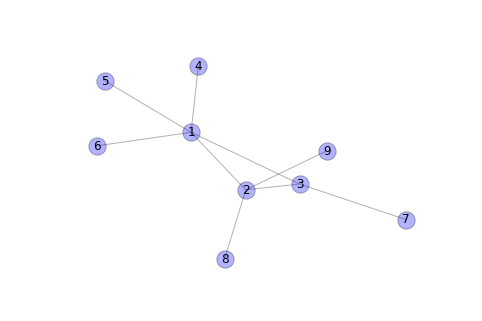

In [8]:
#Ejemplo 1
G=creacion(range(1,9),[(1,2),(1,3),(1,4),(1,5),(1,6),(2,3),(2,8),(2,9),(3,7)])
mostrar_grafo(G)
print "Simulación de estrategia de vacunación aleatoria:"
print "%0.2f individuo/s vacunado/s" % (aleatorio(10,G)[0])
print "Simulación de estrategia de vacunación aleatoria indirecta:"
print "%0.2f individuo/s vacunado/s" % (aleatorio_indirecta(10,G)[0])

Comparativas de media de simulacion aleatoria y aleatoria indirecta con resultados esperados
|------------------------------------------------------------------------------------------|
Simulacion Aleatoria
-Valores exactos de vacunación (Barras):
[1, 5, 1, 1, 4, 3, 1, 3, 1, 4]
-Media de la simulación (Línea):
2.4


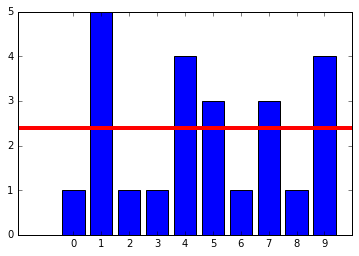

Simulacion Aleatoria Indirecta
-Valores exactos de vacunación (Barras):
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
-Media de la simulación (Línea):
5.0


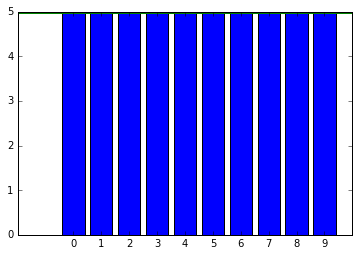

In [10]:
print "Comparativas de media de simulacion aleatoria y aleatoria indirecta con resultados esperados"
print "|------------------------------------------------------------------------------------------|"
relacion_aleatorio(G,1)
relacion_aleatorio(G,2)